In [89]:

# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm, linregress
from scipy.optimize import curve_fit, brentq
import glob
import os

In [90]:

super2 =np.loadtxt("norm/1017_RXC_super1.txt",)[::,100::]
super2 =np.loadtxt("norm/1017_RXC_super2.txt",)[::,70::]
super3 =np.loadtxt("norm/1017_RXC_super3.txt",)[::,100::]
ttype=pd.read_csv("Ttype.csv").to_numpy().T
to=70
sI=0.3
def lin(x,m,b):
    return m*x+b

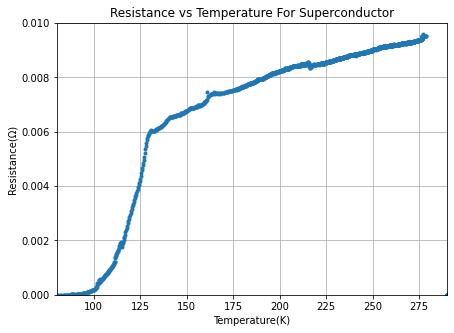

In [91]:
ttypespl = InterpolatedUnivariateSpline(-ttype[1]*10**-3, ttype[0])

# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Superconductor')

# set the limits
ax.set_xlim(80, 290)
ax.set_ylim(0, 0.01)

# set the grid on
ax.grid('on')

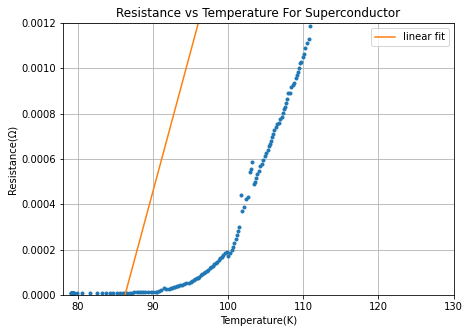

In [92]:
x = np.arange(70, 120, 0.0001)
t = 280
l = 200
p, C = curve_fit(lin, ttypespl(super3[1][to:])[l:t], (super3[0][to:]/sI)[l:t], absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
m = p[0]
b = p[1]
err = sigp[0]

# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
ax.plot(x, lin(x, m, b), label = "linear fit")
#ax.axhline(np.mean(points), color="green")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For Superconductor')

# set the limits
ax.set_xlim(78, 130)
ax.set_ylim(0, 0.0012)

# set the grid on
ax.grid('on')
plt.legend()
t = 296550


In [93]:
brentq(lambda x: lin(x,m,b),80,90),err

(86.26891801444198, 0.018636827382127692)

(4.019108282608696e-05, 4.8281803492473945e-05)

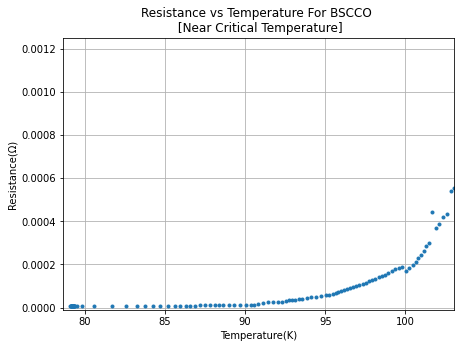

In [94]:
# let us make a simple graph
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
ax.plot(ttypespl(super3[1][to:]), super3[0][to:]/sI,".")
# set the basic properties
ax.set_ylabel('Resistance(Ω)')
ax.set_xlabel('Temperature(K)')
ax.set_title('Resistance vs Temperature For BSCCO \n [Near Critical Temperature]')

# set the limits
ax.set_xlim(78.63,103)
ax.set_ylim(-1e-5,1.25e-3)

# set the grid on
ax.grid('on')

points = (super3[0][to:]/sI)[np.where(ttypespl(super3[1][to:])<99.66)]
np.mean(points), np.std(points)